In [6]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.metrics import mean_absolute_error as mae

from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/visits.csv'
df = pd.read_csv(path, parse_dates=['published'], index_col='published')
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134137 entries, 2008-01-01 18:19:00 to 2016-10-31 23:56:00
Data columns (total 1 columns):
post_id    134137 non-null int64
dtypes: int64(1)
memory usage: 2.0 MB


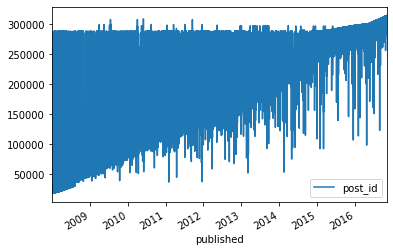

In [9]:
df.plot();

In [10]:
df.resample('1y').count()

,post_id
published,
2008-12-31,7743
2009-12-31,10783
2010-12-31,13091
2011-12-31,15063
2012-12-31,15972
2013-12-31,15537
2014-12-31,16180
2015-12-31,23452
2016-12-31,16316


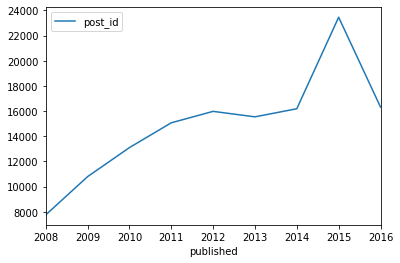

In [11]:
df.resample('1y').count().plot();

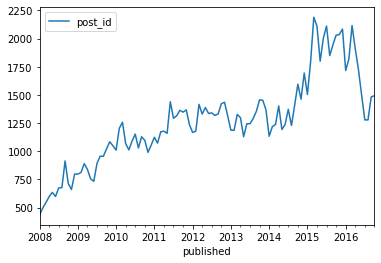

In [12]:
df.resample('1m').count().plot();

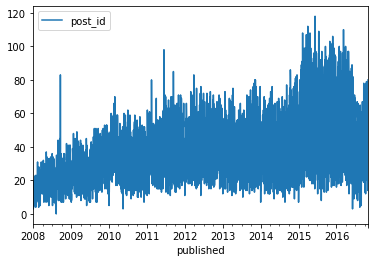

In [13]:
df.resample('1d').count().plot();

In [14]:
df_day = df.resample('1d').count().reset_index()
df_day.columns = ['ds', 'y']
df_day.head()

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4


In [73]:
num_points_to_predict = 100

train = df_day[:-num_points_to_predict]
test = df_day[-num_points_to_predict:]

train_log = train.copy()
train_log['y'] = np.log1p(train_log['y'])

In [16]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [17]:
future = m.make_future_dataframe(periods =num_points_to_predict, freq='D', include_history=False)
future.head()

,ds
0,2016-07-24
1,2016-07-25
2,2016-07-26
3,2016-07-27
4,2016-07-28


In [18]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-24,65.570319,27.231349,57.099429,65.570319,65.570319,-22.811050,-22.811050,-22.811050,-20.821566,-20.821566,-20.821566,-1.989484,-1.989484,-1.989484,0.0,0.0,0.0,42.759270
1,2016-07-25,65.591565,57.480943,87.545410,65.591565,65.591565,7.570613,7.570613,7.570613,9.600782,9.600782,9.600782,-2.030169,-2.030169,-2.030169,0.0,0.0,0.0,73.162178
2,2016-07-26,65.612812,59.551641,90.447760,65.612812,65.612812,9.608172,9.608172,9.608172,11.674800,11.674800,11.674800,-2.066628,-2.066628,-2.066628,0.0,0.0,0.0,75.220984
3,2016-07-27,65.634058,58.291885,88.592960,65.634058,65.634058,7.589450,7.589450,7.589450,9.688338,9.688338,9.688338,-2.098888,-2.098888,-2.098888,0.0,0.0,0.0,73.223508
4,2016-07-28,65.655304,57.687097,85.409952,65.655304,65.655304,6.283954,6.283954,6.283954,8.410943,8.410943,8.410943,-2.126990,-2.126990,-2.126990,0.0,0.0,0.0,71.939258


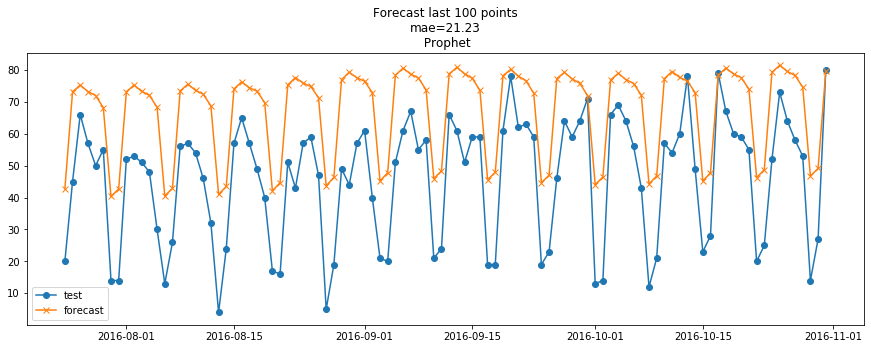

In [19]:
def plot_forecast(test, forecast):
    forecast = forecast[-num_points_to_predict:]
    plt.figure(figsize=(15,5))
    score = np.round(mae(test.y, forecast.yhat), 2)
    
    plt.title('Forecast last {} points\nmae={}\n Prophet'.format(num_points_to_predict,score))
    plt.plot(test.ds, test.y, 'o-', label='test')
    plt.plot(test.ds, forecast.yhat, 'x-', label= 'forecast')
    plt.legend();

plot_forecast(test, forecast)

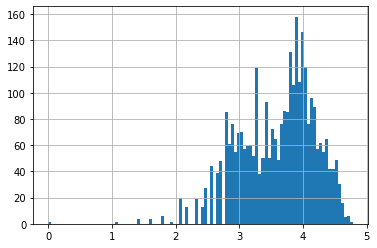

In [20]:
np.log1p(train.y).hist(bins=100);

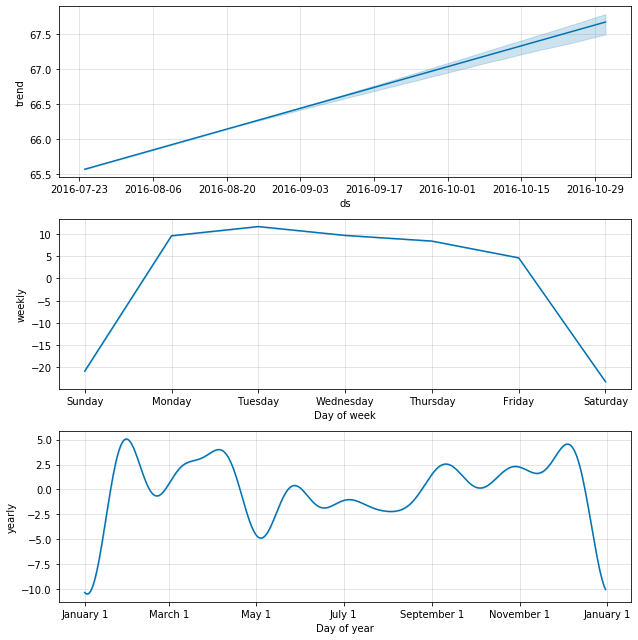

In [21]:
m.plot_components(forecast);


Trend oraz wykryta sezonowość tygodniowa i roczna.

In [22]:
len(train), len(test)

(3127, 100)

In [23]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m , initial = '2500 days', period='10 days', horizon='30 days')

INFO:fbprophet:Making 60 forecasts with cutoffs between 2014-11-11 00:00:00 and 2016-06-23 00:00:00
f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. 

In [24]:
df_cv.shape

(1800, 6)

In [25]:
df_cv.groupby('cutoff').count().head(10)

,ds,yhat,yhat_lower,yhat_upper,y
cutoff,,,,,
2014-11-11,30,30,30,30,30
2014-11-21,30,30,30,30,30
2014-12-01,30,30,30,30,30
2014-12-11,30,30,30,30,30
2014-12-21,30,30,30,30,30
2014-12-31,30,30,30,30,30
2015-01-10,30,30,30,30,30
2015-01-20,30,30,30,30,30
2015-01-30,30,30,30,30,30


In [26]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [27]:
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,3 days,347.669536,18.645899,15.538596,0.504306,0.461111
1,4 days,317.638012,17.822402,15.130433,0.395891,0.444444
2,5 days,327.680340,18.101943,15.221285,0.410910,0.461111
3,6 days,339.751243,18.432342,15.190313,0.406196,0.483333
4,7 days,368.566496,19.198086,15.731338,0.415546,0.466667


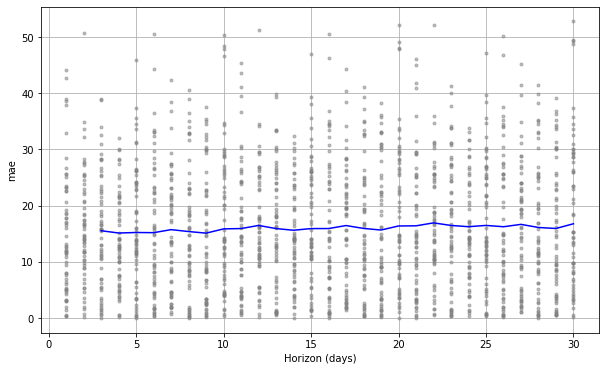

In [28]:
plot_cross_validation_metric(df_cv, 'mae');

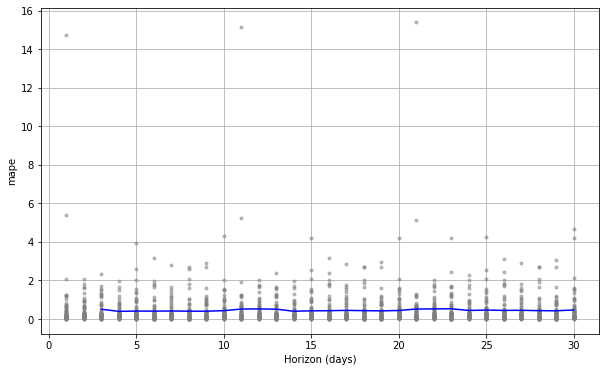

In [29]:
#Wizualizacja procentowego błędu mae
plot_cross_validation_metric(df_cv, 'mape');

In [30]:
num_points_to_predict = 100

train = df_day[:-num_points_to_predict]
test = df_day[-num_points_to_predict:]

train_log = train.copy()
train_log['y'] = np.log1p(train_log['y'])

In [31]:
m = Prophet(changepoint_prior_scale=0.004)
m.fit(train_log)
future = m.make_future_dataframe(periods = num_points_to_predict, freq='D', include_history=False)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [32]:
forecast= m.predict(future)
forecast['yhat'] = np.expm1(forecast.yhat)

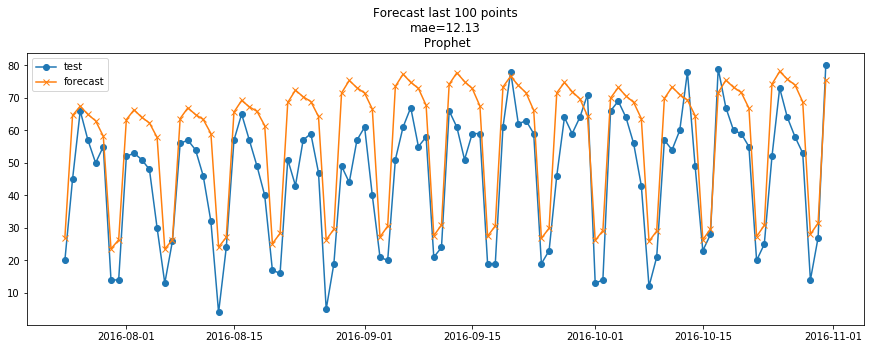

In [33]:
plot_forecast(test, forecast);

In [311]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy import stats


In [711]:
train_box = train.copy()
train_box.head()

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4


In [712]:
train_box[train_box['y'] == 0] = 1

In [713]:
train_box.head()

,ds,y
0,2008-01-01 00:00:00,3
1,2008-01-02 00:00:00,3
2,2008-01-03 00:00:00,4
3,2008-01-04 00:00:00,14
4,2008-01-05 00:00:00,4


In [714]:
train_box['y' ] = boxcox(train_box['y' ], lmbda=-0.01893)

In [715]:
train_box.head()

,ds,y
0,2008-01-01 00:00:00,1.087267
1,2008-01-02 00:00:00,1.087267
2,2008-01-03 00:00:00,1.368262
3,2008-01-04 00:00:00,2.574221
4,2008-01-05 00:00:00,1.368262


In [716]:
train_box['ds'] = pd.to_datetime(train_box['ds'], errors='coerce')

In [717]:
train_box['ds'].head()

0   2008-01-01
1   2008-01-02
2   2008-01-03
3   2008-01-04
4   2008-01-05
Name: ds, dtype: datetime64[ns]

In [718]:
df = train_box.dropna(axis=0, subset=['ds'])
df.head()

,ds,y
0,2008-01-01,1.087267
1,2008-01-02,1.087267
2,2008-01-03,1.368262
3,2008-01-04,2.574221
4,2008-01-05,1.368262


In [719]:
m = Prophet(changepoint_prior_scale=0.003615, weekly_seasonality=True)

In [720]:
m.fit(df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [721]:
future = m.make_future_dataframe(periods = num_points_to_predict, freq='D', include_history=False)

In [722]:
forecast= m.predict(future)
forecast['yhat'] = np.expm1(forecast.yhat)

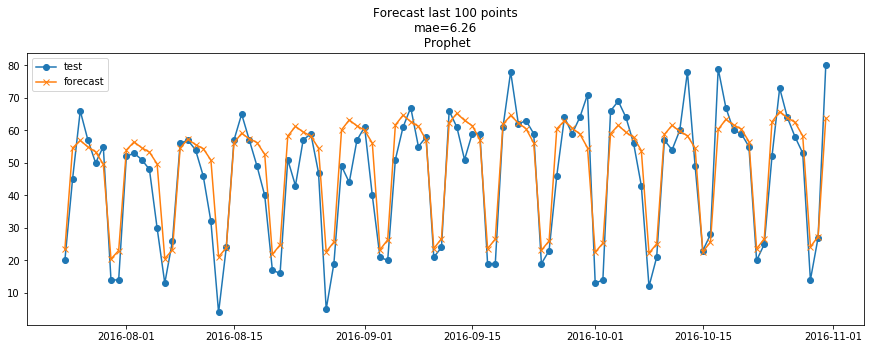

In [723]:
plot_forecast(test, forecast);

In [787]:
train_box1p = train.copy()
train_box1p.head()

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4


In [788]:
train_box1p['y' ] = boxcox1p(train_box1p['y' ], -0.0000213)
train_box1p = train_box1p.dropna(axis=0, subset=['ds'])
train_box1p.head()

,ds,y
0,2008-01-01,1.386274
1,2008-01-02,1.386274
2,2008-01-03,1.609410
3,2008-01-04,2.707972
4,2008-01-05,1.609410


In [789]:
m = Prophet(changepoint_prior_scale=0.00459, weekly_seasonality=True)

In [790]:
m.fit(train_box1p)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
f:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [791]:
future = m.make_future_dataframe(periods = num_points_to_predict, freq='D', include_history=False)

In [792]:
forecast= m.predict(future)
forecast['yhat'] = np.expm1(forecast.yhat)

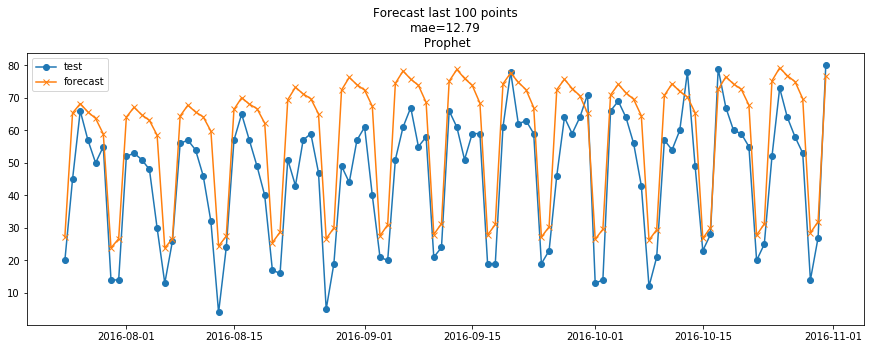

In [793]:
plot_forecast(test, forecast);